In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10, 7)
import os
import sys

In [4]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
numeric_cols = ["bath", "balcony", "price"]

In [8]:
s1 = df1.bath.isnull()

In [9]:
idx = [i for i in s1.index if s1[i] == True]

In [10]:
df1.drop(idx, axis=0, inplace=True)

In [11]:
df1.shape

(13247, 9)

In [12]:
numeric_cols

['bath', 'balcony', 'price']

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=2)

In [14]:
df1.balcony = pd.Series(imputer.fit_transform(df1.balcony.to_numpy().reshape(len(df1),1)).reshape(len(df1)))

In [15]:
temp = df1[df1.balcony.isnull()]

In [16]:
idx = temp.index

In [19]:
df1.balcony[idx] = 2

<ipython-input-19-77421579ddc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.balcony[idx] = 2
/home/divyanshu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
def handle_sqft(x):
  token = x.split("-")
  if len(token) == 2:
    try:
      return (float(token[0]) + float(token[1]))/2
    except:
      print("some error occured")

  try:
    return float(x)
  except:
    return None

In [22]:
df1.total_sqft = df1.total_sqft.apply(handle_sqft)

In [23]:
temp = df1[df1.total_sqft.isnull()]
idx = temp.index
df1.drop(idx, axis=0, inplace=True)

In [24]:
def handle_bhk(x):
  token = x.split(" ")
  if len(token)==2:
    return float(token[0])
  
  return float(x)

  

In [25]:
df1["size"] = df1["size"].apply(handle_bhk)

In [27]:
idx = df1[df1["size"] >= 10].index

df1.drop(idx, axis=0, inplace=True)

In [28]:
df1.rename(columns={"size":"bedrooms"}, inplace=True)

In [29]:
df1.drop(["availability"], axis=1,inplace=True)

In [30]:
df1.area_type = df1.area_type.apply(lambda x: x.strip())


In [31]:
df1.drop(["society"], axis=1, inplace=True)

In [32]:
df1.drop(df1[df1.location.isnull()].index, axis=0, inplace=True)

In [33]:
df1.location = df1.location.apply(lambda x: x.strip())

In [34]:
location_stats = df1.groupby("location").location.agg("count")

In [33]:
location_stats.sort_values(ascending=False)

location
Whitefield                     533
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 264
Thanisandra                    235
                              ... 
Kasthuri Nagar East Of NGEF      1
Kathriguppe IV Phase             1
Keerthi Layout                   1
Kenchanehalli R R Nagar          1
whitefiled                       1
Name: location, Length: 1277, dtype: int64

In [35]:
location_less_10 = location_stats[location_stats <= 10]

In [36]:
df1.location = df1.location.apply(lambda x: "other" if x in location_less_10 else x)

In [37]:
price_per_sqfeet = df1["price"]*100000/df1["total_sqft"]
price_per_sqfeet = pd.DataFrame(price_per_sqfeet, columns=["price_per_sqft"])

In [38]:
df1 = pd.concat([df1, price_per_sqfeet], axis=1)

In [39]:
temp = df1.total_sqft/df1.bedrooms < 300

In [40]:
temp = temp[temp]

In [41]:
idx = temp.index

In [42]:
df2 = df1.drop(idx, axis=0)

In [43]:
df2

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5.0,3453.0,4.0,2.0,231.00,6689.834926
13316,Super built-up Area,other,4.0,3600.0,5.0,2.0,400.00,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1141.0,2.0,2.0,60.00,5258.545136
13318,Super built-up Area,Padmanabhanagar,4.0,4689.0,4.0,2.0,488.00,10407.336319


In [44]:
import seaborn as sns

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

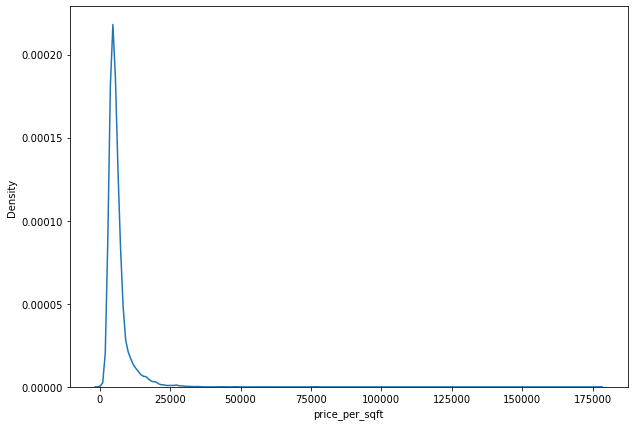

In [45]:
sns.kdeplot(data=df2, x = "price_per_sqft")

In [48]:
def remove_price_per_sqft_outliers(df):

  df_out = pd.DataFrame()
  reduced_df = pd.DataFrame()

  for key,subdf in df.groupby("location"):

    mean = np.mean(subdf.price_per_sqft)
    std = np.std(subdf.price_per_sqft)

    reduced_df = subdf[(subdf.price_per_sqft <= mean+2*std) & (subdf.price_per_sqft >= mean-2*std)]

    df_out = pd.concat([df_out, reduced_df], axis=0, ignore_index=True)

  return df_out


In [49]:
df3 = remove_price_per_sqft_outliers(df2)

In [50]:
idx = df3[df3.bath > df3.bedrooms + 2].index

In [51]:
df3.shape

(11927, 8)

In [52]:
df3.drop(idx, axis=0, inplace=True)

In [53]:
df3.drop(["price_per_sqft"], axis=1, inplace=True)

In [71]:
# sns.scatterplot(data=df3, x="bedrooms", y = "price")
df3[df3.bedrooms>=9].price*100000 / df3[df3.bedrooms>=9].total_sqft


4461      4347.826087
4510      3225.806452
5809     19004.629630
6079      4200.000000
6587      4583.333333
6752      6666.666667
8495      2765.957447
10184     3688.888889
10330    11111.111111
10465      416.666667
11319     4062.500000
11896     3260.869565
dtype: float64

In [72]:
df3.drop([10465], axis=0,inplace=True)

In [78]:
(df3.price*100000  / df3.total_sqft).sort_values()

9818       267.829813
9631       729.860414
11157      729.860414
11783      912.151821
9928      1250.000000
             ...     
2932     26973.684211
2931     27083.333333
4170     29166.666667
4174     29166.666667
4142     30241.935484
Length: 11921, dtype: float64

In [79]:
df3.drop([9818, 9631, 11157], axis=0,inplace=True)

In [93]:
df3.drop(df3[df3.total_sqft >= 10000].index, axis=0, inplace=True)

In [94]:
df3 = pd.get_dummies(df3, columns=["location"])

In [95]:
df3 = pd.get_dummies(df3, columns=["area_type"])

In [163]:
df4 = df3.copy()

In [165]:
df4.drop(df4[df4.price <= 10].index, axis=0, inplace=True)

In [166]:
X = df4.drop("price", axis=1)
y = df4.price

In [167]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR

In [168]:
from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

In [250]:
def get_best(X,y):
  models = {
    "linear_regression": {
      "model":LinearRegression(),
      "params": {
        "normalize":[True,False]
      }
    },
    "ElasticNet" : {
      "model":ElasticNet(),
      "params":{
        "normalize":[True,False],
        "alpha":[0.01,0.03,0.1,0.3,1],
        "l1_ratio": [0.2,0.5,1]
      }
    },
    "RandomForest": {
      "model": RandomForestRegressor(),
      "params": {
        "n_estimators":[30,40,50,60]
      }
    }
  }

  scores = []
  folds = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

  for key, model in models.items():
    gs = GridSearchCV(model["model"], model["params"], cv = folds, return_train_score=False)
    gs.fit(X,y)

    scores.append({
      "model":key,
      "best_score":gs.best_score_,
      "best_params":gs.best_params_
    })

  return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

In [252]:
get_best(X,y)

,model,best_score,best_params
0,linear_regression,0.735168,{'normalize': False}
1,ElasticNet,0.735301,"{'alpha': 0.01, 'l1_ratio': 1, 'normalize': Fa..."
2,RandomForest,0.794736,{'n_estimators': 50}


In [169]:
model_rf = RandomForestRegressor(n_estimators=50)

In [170]:
folds = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

score = []

for train_index, test_index in folds.split(df4):
  X_train = df4.iloc[train_index].drop("price", axis=1)
  y_train = df4.iloc[train_index].price

  X_test = df4.iloc[test_index].drop("price", axis=1)
  y_test = df4.iloc[test_index].price

  model_rf.fit(X_train,y_train)
  score.append(model_rf.score(X_test, y_test))

In [174]:
model_rf.score(X,y)

0.9115388688855502

In [172]:
sum=0
for i in score:
  sum += i
sum/len(score)*100

73.08229750633227

In [182]:
import pickle

with open("model_real_estate.pickle", "wb") as f:
  pickle.dump(model_rf, f)

In [183]:
import json

columns = {
  "data_columns":[col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
  f.write(json.dumps(columns))


In [184]:
with open("model_real_estate.pickle", "rb") as f:
  model = pickle.load(f)

In [185]:
model.score(X_train, y_train)

0.9552765285512012